<a href="https://colab.research.google.com/github/Song-Hyunsub/Univ_Study/blob/main/%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EC%9D%B4%ED%95%B4_%EC%8B%A4%EC%8A%B5/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_8%EC%B0%A8%EC%8B%9C_TFIDF_%EC%8B%A0%EB%AC%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from urllib.parse import quote_plus

import requests
import lxml.html
import codecs

articles_all = []
import glob
import nltk
import re

articles_all = []
import glob
cat_list = glob.glob("bbc\\*")
cat_list

#여러가지 주제의 뉴스기사 읽어오기
for folder in cat_list:
    print(folder)

    file_list = glob.glob(folder + "\\*.txt")
    #print(file_list)

    for fn in file_list:
        print(fn)

        fn_contents = open(fn, 'r')
        article = fn_contents.read()
        #print(article)
        fn_contents.close()
        articles_all.append(article)


#2글자 이상의 명사만 추출함.
def get_noun(text):
    text = re.sub('[^A-Za-z ]+', '', text)
    texts = nltk.word_tokenize(text)
    return ([x for (x,y) in (nltk.pos_tag(texts)) if (y == 'NNP' or y == 'NN') and len(x) > 1])


bbc\business
bbc\business\001.txt
bbc\business\002.txt
bbc\business\003.txt
bbc\business\004.txt
bbc\business\005.txt
bbc\business\006.txt
bbc\business\007.txt
bbc\business\008.txt
bbc\business\009.txt
bbc\business\010.txt
bbc\business\011.txt
bbc\business\012.txt
bbc\business\013.txt
bbc\business\014.txt
bbc\business\015.txt
bbc\business\016.txt
bbc\business\017.txt
bbc\business\018.txt
bbc\business\019.txt
bbc\business\020.txt
bbc\business\021.txt
bbc\business\022.txt
bbc\business\023.txt
bbc\business\024.txt
bbc\business\025.txt
bbc\business\026.txt
bbc\business\027.txt
bbc\business\028.txt
bbc\business\029.txt
bbc\business\030.txt
bbc\business\031.txt
bbc\business\032.txt
bbc\business\033.txt
bbc\business\034.txt
bbc\business\035.txt
bbc\business\036.txt
bbc\business\037.txt
bbc\business\038.txt
bbc\business\039.txt
bbc\business\040.txt
bbc\business\041.txt
bbc\business\042.txt
bbc\business\043.txt
bbc\business\044.txt
bbc\business\045.txt
bbc\business\046.txt
bbc\business\047.txt


In [ ]:
len(articles_all) , articles_all

(2224,
 ['Ad sales boost Time Warner profit\n\nQuarterly profits at US media giant TimeWarner jumped 76% to $1.13bn (짙600m) for the three months to December, from $639m year-earlier.\n\nThe firm, which is now one of the biggest investors in Google, benefited from sales of high-speed internet connections and higher advert sales. TimeWarner said fourth quarter sales rose 2% to $11.1bn from $10.9bn. Its profits were buoyed by one-off gains which offset a profit dip at Warner Bros, and less users for AOL.\n\nTime Warner said on Friday that it now owns 8% of search-engine Google. But its own internet business, AOL, had has mixed fortunes. It lost 464,000 subscribers in the fourth quarter profits were lower than in the preceding three quarters. However, the company said AOL\'s underlying profit before exceptional items rose 8% on the back of stronger internet advertising revenues. It hopes to increase subscribers by offering the online service free to TimeWarner internet customers and will t

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

cv = TfidfVectorizer(tokenizer=get_noun, max_features=100)
tdm = cv.fit_transform(articles_all)

# print(tdm.toarray())
# print(tdm)
# TF_IDF가 카테고리별로 중요한 단어를 추출해줌

import numpy
import operator
words = cv.get_feature_names() # 단어사전 추출
count_mat = tdm.sum(axis=0)
count = numpy.squeeze(numpy.asarray(count_mat)) # 차원 압축
word_count = list(zip(words, count))
word_count = sorted(word_count, key=operator.itemgetter(1), reverse=True) # score가 높은 것을 가장 위에 표시하도록 함
word_count

hot_key = list(dict(word_count).keys())
hot_key


['radio',
 'end',
 'line',
 'news',
 'house',
 'france',
 'research',
 'access',
 'issue',
 'case',
 'bbc',
 'growth',
 'bill',
 'europe',
 'chance',
 'tv',
 'election',
 'london',
 'country',
 'computer',
 'company',
 'star',
 'number',
 'club',
 'lot',
 'move',
 'britain',
 'decision',
 'action',
 'labour',
 'economy',
 'industry',
 'oil',
 'business',
 'report',
 'year',
 'record',
 'minister',
 'player',
 'information',
 'film',
 'director',
 'law',
 'part',
 'service',
 'home',
 'time',
 'life',
 'side',
 'game',
 'security',
 'technology',
 'blair',
 'money',
 'work',
 'show',
 'something',
 'music',
 'president',
 'world',
 'tax',
 'power',
 'mr',
 'share',
 'england',
 'day',
 'howard',
 'uk',
 'group',
 'rate',
 'leader',
 'series',
 'campaign',
 'place',
 'bn',
 'video',
 'way',
 'office',
 'interest',
 'week',
 'executive',
 'software',
 'bank',
 'chancellor',
 'market',
 'role',
 'system',
 'deal',
 'court',
 'month',
 'man',
 'government',
 'team',
 'state',
 'secretary',


In [ ]:
len(words) , words , tdm

(100,
 ['access',
  'action',
  'bank',
  'bbc',
  'bill',
  'blair',
  'bn',
  'britain',
  'business',
  'campaign',
  'case',
  'chance',
  'chancellor',
  'club',
  'company',
  'computer',
  'country',
  'court',
  'cup',
  'day',
  'deal',
  'decision',
  'director',
  'economy',
  'election',
  'end',
  'england',
  'europe',
  'executive',
  'film',
  'firm',
  'france',
  'game',
  'government',
  'group',
  'growth',
  'home',
  'house',
  'howard',
  'industry',
  'information',
  'interest',
  'issue',
  'labour',
  'law',
  'leader',
  'life',
  'line',
  'london',
  'lot',
  'man',
  'market',
  'minister',
  'money',
  'month',
  'move',
  'mr',
  'music',
  'news',
  'number',
  'office',
  'oil',
  'part',
  'party',
  'phone',
  'place',
  'player',
  'power',
  'president',
  'radio',
  'rate',
  'record',
  'report',
  'research',
  'role',
  'secretary',
  'security',
  'series',
  'service',
  'share',
  'show',
  'side',
  'software',
  'something',
  'spokesman'

TDM = 2224 * 100  
article : 2224  
word : 100  
TDM = term document matrix

In [ ]:
count_mat , count_mat.shape

(matrix([[ 33.02954156,  54.55621512,  53.68204836,  54.4485829 ,
           36.48854665,  60.04629886,  86.76626884,  35.77560476,
           52.51627017,  40.69450076,  45.10282166,  49.96344971,
           30.00931697,  59.36713809,  88.94227049,  43.0387114 ,
           53.65009342,  54.10414361,  60.65492574,  58.05334671,
           57.84171827,  56.58243221,  65.37687603,  58.01675423,
           64.40312063,  60.36874288,  72.63546154,  45.16708978,
           49.66625042, 118.26126245,  79.6011348 ,  50.1666615 ,
          128.96157026, 103.73693857,  67.75730002,  66.79526497,
           78.447832  ,  42.81517423,  35.35575076,  54.58752913,
           51.5341859 ,  42.90753927,  35.87958212,  38.21499022,
           45.64002727,  36.87512307,  49.20237328,  43.56408622,
           44.91914381,  53.54896388,  45.85356619,  85.56520559,
           61.48377573,  63.74705811,  58.20600643,  43.11431216,
          123.99341074,  88.17971824,  65.89989446, 100.01055249,
          

=> 숫자가 높을수록 중요한 단어

In [ ]:
count , count.shape

(array([ 33.02954156,  54.55621512,  53.68204836,  54.4485829 ,
         36.48854665,  60.04629886,  86.76626884,  35.77560476,
         52.51627017,  40.69450076,  45.10282166,  49.96344971,
         30.00931697,  59.36713809,  88.94227049,  43.0387114 ,
         53.65009342,  54.10414361,  60.65492574,  58.05334671,
         57.84171827,  56.58243221,  65.37687603,  58.01675423,
         64.40312063,  60.36874288,  72.63546154,  45.16708978,
         49.66625042, 118.26126245,  79.6011348 ,  50.1666615 ,
        128.96157026, 103.73693857,  67.75730002,  66.79526497,
         78.447832  ,  42.81517423,  35.35575076,  54.58752913,
         51.5341859 ,  42.90753927,  35.87958212,  38.21499022,
         45.64002727,  36.87512307,  49.20237328,  43.56408622,
         44.91914381,  53.54896388,  45.85356619,  85.56520559,
         61.48377573,  63.74705811,  58.20600643,  43.11431216,
        123.99341074,  88.17971824,  65.89989446, 100.01055249,
         49.39016675,  45.06076465,  74.

=> dimension size를 하나 줄인 것!

In [ ]:
list(dict(word_count).keys())

['radio',
 'end',
 'line',
 'news',
 'house',
 'france',
 'research',
 'access',
 'issue',
 'case',
 'bbc',
 'growth',
 'bill',
 'europe',
 'chance',
 'tv',
 'election',
 'london',
 'country',
 'computer',
 'company',
 'star',
 'number',
 'club',
 'lot',
 'move',
 'britain',
 'decision',
 'action',
 'labour',
 'economy',
 'industry',
 'oil',
 'business',
 'report',
 'year',
 'record',
 'minister',
 'player',
 'information',
 'film',
 'director',
 'law',
 'part',
 'service',
 'home',
 'time',
 'life',
 'side',
 'game',
 'security',
 'technology',
 'blair',
 'money',
 'work',
 'show',
 'something',
 'music',
 'president',
 'world',
 'tax',
 'power',
 'mr',
 'share',
 'england',
 'day',
 'howard',
 'uk',
 'group',
 'rate',
 'leader',
 'series',
 'campaign',
 'place',
 'bn',
 'video',
 'way',
 'office',
 'interest',
 'week',
 'executive',
 'software',
 'bank',
 'chancellor',
 'market',
 'role',
 'system',
 'deal',
 'court',
 'month',
 'man',
 'government',
 'team',
 'state',
 'secretary',


In [ ]:
hot_key

['radio',
 'end',
 'line',
 'news',
 'house',
 'france',
 'research',
 'access',
 'issue',
 'case',
 'bbc',
 'growth',
 'bill',
 'europe',
 'chance',
 'tv',
 'election',
 'london',
 'country',
 'computer',
 'company',
 'star',
 'number',
 'club',
 'lot',
 'move',
 'britain',
 'decision',
 'action',
 'labour',
 'economy',
 'industry',
 'oil',
 'business',
 'report',
 'year',
 'record',
 'minister',
 'player',
 'information',
 'film',
 'director',
 'law',
 'part',
 'service',
 'home',
 'time',
 'life',
 'side',
 'game',
 'security',
 'technology',
 'blair',
 'money',
 'work',
 'show',
 'something',
 'music',
 'president',
 'world',
 'tax',
 'power',
 'mr',
 'share',
 'england',
 'day',
 'howard',
 'uk',
 'group',
 'rate',
 'leader',
 'series',
 'campaign',
 'place',
 'bn',
 'video',
 'way',
 'office',
 'interest',
 'week',
 'executive',
 'software',
 'bank',
 'chancellor',
 'market',
 'role',
 'system',
 'deal',
 'court',
 'month',
 'man',
 'government',
 'team',
 'state',
 'secretary',


In [ ]:
tdm , len(articles_all)

(<2224x100 sparse matrix of type '<class 'numpy.float64'>'
 	with 23890 stored elements in Compressed Sparse Row format>, 2224)

C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1288: UserWarning: findfont: Font family ['Gulim'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


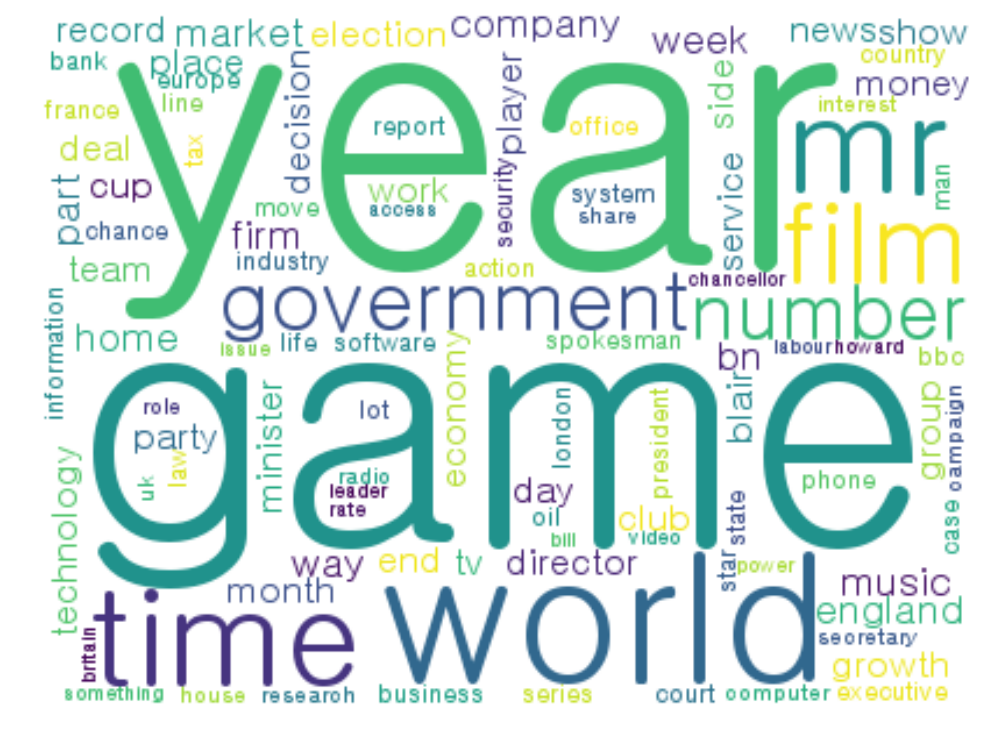

In [ ]:
%matplotlib inline
from matplotlib import pyplot
from wordcloud import WordCloud
wc = WordCloud(font_path='C:\\Windows\\Fonts\\NGULIM.ttf', background_color='white', width=400, height=300)
cloud = wc.fit_words(dict(word_count))
pyplot.figure(figsize=(12, 9))
pyplot.imshow(cloud)
pyplot.axis("off")
pyplot.show()

count_iter = iter(count)
word_dict = dict(zip(words, count_iter))
word_dict

import operator
sorted_tfidf = sorted(word_dict.items(), key=operator.itemgetter(1) , reverse=True) # 가장 높은 쪽이 제일 위에 표시하도록 함
sorted_tfidf

import pandas as pd
tfidf_df = pd.DataFrame(list(sorted_tfidf) , columns = ("word" , "tfidf_score"))
tfidf_df

tfidf_df.to_csv('sorted_tfidf.csv')

=> 중요한 단어들이 가장 크게 보임!

In [ ]:
count , count.shape

(array([ 33.02954156,  54.55621512,  53.68204836,  54.4485829 ,
         36.48854665,  60.04629886,  86.76626884,  35.77560476,
         52.51627017,  40.69450076,  45.10282166,  49.96344971,
         30.00931697,  59.36713809,  88.94227049,  43.0387114 ,
         53.65009342,  54.10414361,  60.65492574,  58.05334671,
         57.84171827,  56.58243221,  65.37687603,  58.01675423,
         64.40312063,  60.36874288,  72.63546154,  45.16708978,
         49.66625042, 118.26126245,  79.6011348 ,  50.1666615 ,
        128.96157026, 103.73693857,  67.75730002,  66.79526497,
         78.447832  ,  42.81517423,  35.35575076,  54.58752913,
         51.5341859 ,  42.90753927,  35.87958212,  38.21499022,
         45.64002727,  36.87512307,  49.20237328,  43.56408622,
         44.91914381,  53.54896388,  45.85356619,  85.56520559,
         61.48377573,  63.74705811,  58.20600643,  43.11431216,
        123.99341074,  88.17971824,  65.89989446, 100.01055249,
         49.39016675,  45.06076465,  74.

In [ ]:
count_iter , type(count_iter)

(<iterator at 0x1325908eb70>, iterator)

In [ ]:
words , len(words)

(['access',
  'action',
  'bank',
  'bbc',
  'bill',
  'blair',
  'bn',
  'britain',
  'business',
  'campaign',
  'case',
  'chance',
  'chancellor',
  'club',
  'company',
  'computer',
  'country',
  'court',
  'cup',
  'day',
  'deal',
  'decision',
  'director',
  'economy',
  'election',
  'end',
  'england',
  'europe',
  'executive',
  'film',
  'firm',
  'france',
  'game',
  'government',
  'group',
  'growth',
  'home',
  'house',
  'howard',
  'industry',
  'information',
  'interest',
  'issue',
  'labour',
  'law',
  'leader',
  'life',
  'line',
  'london',
  'lot',
  'man',
  'market',
  'minister',
  'money',
  'month',
  'move',
  'mr',
  'music',
  'news',
  'number',
  'office',
  'oil',
  'part',
  'party',
  'phone',
  'place',
  'player',
  'power',
  'president',
  'radio',
  'rate',
  'record',
  'report',
  'research',
  'role',
  'secretary',
  'security',
  'series',
  'service',
  'share',
  'show',
  'side',
  'software',
  'something',
  'spokesman',
  's

get_noun() : 명사이면서 길이가 2 이상인 것만 필터링하는 함수